<a href="https://colab.research.google.com/github/H-E-L-P/dmu_products/blob/master/dmu31/dmu31_Examples/HELP_VO_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ![](https://avatars1.githubusercontent.com/u/7880370?s=75&v=4)  Virtual Observatory at susseX (VOX) Introduction

---
The Virtual Observatory at susseX (VOX) is a virtual observatory server built using the German Astrophysical Virtual
Observatory (GAVO) DaCHS software: [*Data Center Helper Suite*](https://dachs-doc.readthedocs.io). VOX contains both the maps and the catalogue data. 

Maps are available through the *Simple Image Access Protocol* (SIAP). In particular, VOX makes is possible to get image cutouts at a given position.

The catalogue data is gathered into a single table across all the coverage that
users can query using the *Table Access Protocol* (TAP) with compliant
software like TOPCAT , STILTS or
[PyVO](https://pyvo.readthedocs.io). This allows users to make
sophisticated queries or to remotely crossmatch their catalogues with HELP data.

* Search around a position
* 


In [ ]:
!pip install pyvo

     |████████████████████████████████| 808kB 7.7MB/s 
  Created wheel for pyvo: filename=pyvo-1.1-cp37-none-any.whl size=801573 sha256=668fc5e48d24dce400814d73b62793ed47ad10d8f53766453656d9d5ce53a55a
  Stored in directory: /root/.cache/pip/wheels/d9/00/df/656aac56938f1c83dfcb361346f74101ce1f8c849fc93b18dc
  Created wheel for mimeparse: filename=mimeparse-0.1.3-cp37-none-any.whl size=3864 sha256=725de6c59d010a4dbe75fb60b1ffcc7b6712bee883f0e672bbeb8059cdeddd14
  Stored in directory: /root/.cache/pip/wheels/54/ca/c7/3db47cc5c748286db22a7fab43ccf985903d2b9ca119de16ab
Successfully built pyvo mimeparse


In [ ]:
from astropy.io import ascii, fits
from astropy.table import Table
import pylab as plt
%matplotlib inline
from astropy import wcs
import pyvo as vo

## Example 1: Get sources located near a single position
A very simple use case to get started with is to find all sources close to a specific position. We do this by using the TAP protocol and writing queries in  the Astronomical Data Query Language (ADQL), a dialect of the Standard Query Language SQL. Its purpose is to give you a formal language to specify what data you are interested in.

To get started using ADQL, try this [ADQL course](http://docs.g-vo.org/adql). There are plenty of introductions SQL itself, which are perfectly useful for learning ADQL. Check your local bookstore. Online, [A Gentle Introduction to SQL](http://sqlzoo.net/) or chapter three of [Practical PostgreSQL](http://www.faqs.org/docs/ppbook/book1.htm) might be useful; for the purposes of learning ADQL, you can skip everything talking about "DDL" in general introductions.

For this example we need to specify a right accension and declination, and a search radius

In [ ]:
RA=161.63
Dec=59.17
radius=0.028

We also need to create a TAP service that connects to VOX which we can search

In [ ]:

service = vo.dal.TAPService("https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap")

Having connected to the service, we now need to write our query, send it to VOX and get our results back.

To write the query, we:
* use the `SELECT` operational statement and ask for the `TOP 10000` results (VOX has a default maximum return of 2000 rows, so we explicitly specify 10000 to override this). 
* Tell the VO to get the results `FROM herschelhelp.main`, i.e. the main HELP masterlist. You can find the other tables you could use [here](https://herschel-vos.phys.sussex.ac.uk/__system__/dc_tables/list/form).
* Specify that only objects within our search radius from our chosen point are returned. We do this using the `WHERE` condition and `CONTAINS(POINT('ICRS', ra, dec),CIRCLE('ICRS',"+str(RA)+", "+str(Dec)+","+str(radius)+" ))")` The `CONTAINS()` return either 0 if False and 1 if True. 



In [ ]:
resultset = service.search("SELECT TOP 10000 * FROM herschelhelp.main WHERE 1=CONTAINS(POINT('ICRS', ra, dec),CIRCLE('ICRS',"+str(RA)+", "+str(Dec)+","+str(radius)+" ))")

The above command can take a couple of seconds to run (depending on how complicated or large the query). We can then foramt the results into a table.

In [ ]:
masterlist=resultset.to_table()

In [ ]:
masterlist

field,help_id,ra,dec,hp_idx,ebv,redshift,zspec,zspec_qual,zspec_association_flag,stellarity,stellarity_origin,f_90prime_g,ferr_90prime_g,f_ap_90prime_g,ferr_ap_90prime_g,m_90prime_g,merr_90prime_g,m_ap_90prime_g,merr_ap_90prime_g,flag_90prime_g,f_90prime_r,ferr_90prime_r,f_ap_90prime_r,ferr_ap_90prime_r,m_90prime_r,merr_90prime_r,m_ap_90prime_r,merr_ap_90prime_r,flag_90prime_r,f_90prime_z,ferr_90prime_z,f_ap_90prime_z,ferr_ap_90prime_z,m_90prime_z,merr_90prime_z,m_ap_90prime_z,merr_ap_90prime_z,flag_90prime_z,f_acs_f435w,ferr_acs_f435w,f_ap_acs_f435w,ferr_ap_acs_f435w,m_acs_f435w,merr_acs_f435w,m_ap_acs_f435w,merr_ap_acs_f435w,flag_acs_f435w,f_acs_f606w,ferr_acs_f606w,f_ap_acs_f606w,ferr_ap_acs_f606w,m_acs_f606w,merr_acs_f606w,m_ap_acs_f606w,merr_ap_acs_f606w,flag_acs_f606w,f_acs_f775w,ferr_acs_f775w,f_ap_acs_f775w,ferr_ap_acs_f775w,m_acs_f775w,merr_acs_f775w,m_ap_acs_f775w,merr_ap_acs_f775w,flag_acs_f775w,f_acs_f814w,ferr_acs_f814w,f_ap_acs_f814w,ferr_ap_acs_f814w,m_acs_f814w,merr_acs_f814w,m_ap_acs_f814w,merr_ap_acs_f814w,flag_acs_f814w,f_acs_f850lp,ferr_acs_f850lp,f_ap_acs_f850lp,ferr_ap_acs_f850lp,m_acs_f850lp,merr_acs_f850lp,m_ap_acs_f850lp,merr_ap_acs_f850lp,flag_acs_f850lp,f_bessell_b,ferr_bessell_b,f_ap_bessell_b,ferr_ap_bessell_b,m_bessell_b,merr_bessell_b,m_ap_bessell_b,merr_ap_bessell_b,flag_bessell_b,f_bessell_i,ferr_bessell_i,f_ap_bessell_i,ferr_ap_bessell_i,m_bessell_i,merr_bessell_i,m_ap_bessell_i,merr_ap_bessell_i,flag_bessell_i,f_bessell_r,ferr_bessell_r,f_ap_bessell_r,ferr_ap_bessell_r,m_bessell_r,merr_bessell_r,m_ap_bessell_r,merr_ap_bessell_r,flag_bessell_r,f_bessell_u,ferr_bessell_u,f_ap_bessell_u,ferr_ap_bessell_u,m_bessell_u,merr_bessell_u,m_ap_bessell_u,merr_ap_bessell_u,flag_bessell_u,f_bessell_v,ferr_bessell_v,f_ap_bessell_v,ferr_ap_bessell_v,m_bessell_v,merr_bessell_v,m_ap_bessell_v,merr_ap_bessell_v,flag_bessell_v,f_cfht12k_b,ferr_cfht12k_b,f_ap_cfht12k_b,ferr_ap_cfht12k_b,m_cfht12k_b,merr_cfht12k_b,m_ap_cfht12k_b,merr_ap_cfht12k_b,flag_cfht12k_b,f_cfht12k_i,ferr_cfht12k_i,f_ap_cfht12k_i,ferr_ap_cfht12k_i,m_cfht12k_i,merr_cfht12k_i,m_ap_cfht12k_i,merr_ap_cfht12k_i,flag_cfht12k_i,f_cfht12k_r,ferr_cfht12k_r,f_ap_cfht12k_r,ferr_ap_cfht12k_r,m_cfht12k_r,merr_cfht12k_r,m_ap_cfht12k_r,merr_ap_cfht12k_r,flag_cfht12k_r,f_decam_g,ferr_decam_g,f_ap_decam_g,ferr_ap_decam_g,m_decam_g,merr_decam_g,m_ap_decam_g,merr_ap_decam_g,flag_decam_g,f_decam_i,ferr_decam_i,f_ap_decam_i,ferr_ap_decam_i,m_decam_i,merr_decam_i,m_ap_decam_i,merr_ap_decam_i,flag_decam_i,f_decam_r,ferr_decam_r,f_ap_decam_r,ferr_ap_decam_r,m_decam_r,merr_decam_r,m_ap_decam_r,merr_ap_decam_r,flag_decam_r,f_decam_y,ferr_decam_y,f_ap_decam_y,ferr_ap_decam_y,m_decam_y,merr_decam_y,m_ap_decam_y,merr_ap_decam_y,flag_decam_y,f_decam_z,ferr_decam_z,f_ap_decam_z,ferr_ap_decam_z,m_decam_z,merr_decam_z,m_ap_decam_z,merr_ap_decam_z,flag_decam_z,f_galex_fuv,ferr_galex_fuv,f_ap_galex_fuv,ferr_ap_galex_fuv,m_galex_fuv,merr_galex_fuv,m_ap_galex_fuv,merr_ap_galex_fuv,flag_galex_fuv,f_galex_nuv,ferr_galex_nuv,f_ap_galex_nuv,ferr_ap_galex_nuv,m_galex_nuv,merr_galex_nuv,m_ap_galex_nuv,merr_ap_galex_nuv,flag_galex_nuv,f_gpc1_g,ferr_gpc1_g,f_ap_gpc1_g,ferr_ap_gpc1_g,m_gpc1_g,merr_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,flag_gpc1_g,f_gpc1_i,ferr_gpc1_i,f_ap_gpc1_i,ferr_ap_gpc1_i,m_gpc1_i,merr_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,flag_gpc1_i,f_gpc1_r,ferr_gpc1_r,f_ap_gpc1_r,ferr_ap_gpc1_r,m_gpc1_r,merr_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,flag_gpc1_r,f_gpc1_y,ferr_gpc1_y,f_ap_gpc1_y,ferr_ap_gpc1_y,m_gpc1_y,merr_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,flag_gpc1_y,f_gpc1_z,ferr_gpc1_z,f_ap_gpc1_z,ferr_ap_gpc1_z,m_gpc1_z,merr_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,flag_gpc1_z,f_hawki_k,ferr_hawki_k,f_ap_hawki_k,ferr_ap_hawki_k,m_hawki_k,merr_hawki_k,m_ap_hawki_k,merr_ap_hawki_k,flag_hawki_k,f_irac_i1,ferr_irac_i1,f_ap_irac_i1,ferr_ap_irac_i1,m_irac_i1,merr_irac_i1,m_ap_irac_i1,merr_ap_irac_i1,flag_irac_i1,f_irac_i2,ferr_irac_i2,f_ap_irac_i2,ferr_ap_irac_i2,m_irac_i2,merr_irac_i2,m_ap_irac_i2,merr

As you can see, the `masterlist` has returned all the sources we are interested in. Lets do a simple plot to check

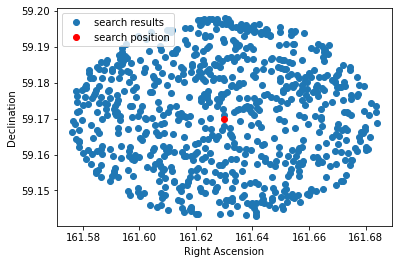

In [ ]:
plt.plot(masterlist['ra'],masterlist['dec'], 'o',label='search results')
plt.plot(RA,Dec,'ro',label='search position')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.legend()

In [ ]:
help(vo.samp)

Help on module pyvo.samp in pyvo:

NAME
    pyvo.samp - A module with helpers for broadcasting results to samp clients

FUNCTIONS
    accessible_table(table)
        a context manager making astropy_table available under a (file)
        URL for the controlled section.
    
    connection(client_name='pyvo client', description='A generic PyVO client', **kwargs)
        a context manager to give the controlled block a SAMP connection.
        The program will disconnect as the controlled block is exited.
    
    find_client_id(conn, name)
        returns the SAMP id of the client with samp.name samp_name.
        
        This will raise a KeyError if the client is not on the hub.
    
    send_image_to(conn, url, client_name=None, name='data')
        asks an image client to open a remote image via SAMP.
    
    send_product_to(conn, url, mtype, client_name=None, name='data')
        sends SAMP messages to load data.
        
        This is a helper for send_spectrum_to and send_ima